<a href="https://colab.research.google.com/github/mustafidah03/Klasifikasi-kematangan-buah-tomat-metode-CNN/blob/main/comvis_tomat_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LIBRARY YANG DIBUTUHKAN

In [ ]:
# Impor library yang diperlukan
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


MENYIAPKAN DATASET

In [ ]:
import os

# Tampilkan isi folder dataset
dataset_path = '/content/drive/MyDrive/Colab Notebooks/buah tomat'
print(os.listdir(dataset_path))


['Mentah', 'Setengah Matang', 'Matang']


In [ ]:
dataset_path = '/content/drive/MyDrive/Colab Notebooks/buah tomat'

MEMBUAT DAFTAR KATEGORI PADA BUAH TOMAT

In [ ]:
# Daftar kategori kematangan buah tomat
categories = ['Matang', 'Mentah', 'Setengah Matang']

Menampilkan gambar: /content/drive/MyDrive/Colab Notebooks/buah tomat/Matang/1 (1).jpg
Menampilkan gambar: /content/drive/MyDrive/Colab Notebooks/buah tomat/Mentah/1 (1).jpg
Menampilkan gambar: /content/drive/MyDrive/Colab Notebooks/buah tomat/Setengah Matang/1/1 (33).jpg


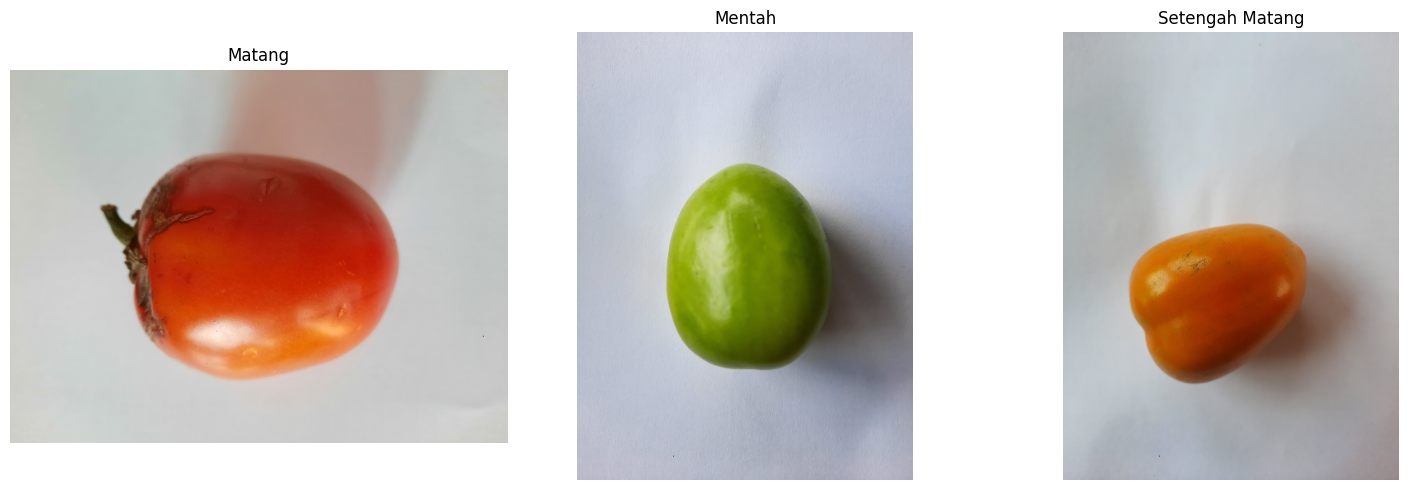

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

dataset_path = '/content/drive/MyDrive/Colab Notebooks/buah tomat'
categories = ['Matang', 'Mentah', 'Setengah Matang']

fig, axes = plt.subplots(nrows=1, ncols=len(categories), figsize=(15, 5))

for i, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)

    image_files = []

    # Khusus untuk kategori 'Setengah Matang' yang punya subfolder
    if category == 'Setengah Matang':
        subfolders = ['1', '2']
        for sub in subfolders:
            sub_path = os.path.join(category_path, sub)
            if os.path.exists(sub_path):
                files = [f for f in os.listdir(sub_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
                if files:
                    image_files.append(os.path.join(sub_path, files[0]))  # Ambil 1 gambar dari tiap sub
    else:
        if os.path.exists(category_path):
            files = [f for f in os.listdir(category_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
            if files:
                image_files.append(os.path.join(category_path, files[0]))

    if not image_files:
        print(f"Tidak ditemukan gambar di kategori: {category}")
        axes[i].set_title(f"{category} (kosong)")
        axes[i].axis('off')
        continue

    img_path = image_files[0]  # ambil gambar pertama dari list
    print(f"Menampilkan gambar: {img_path}")

    img = cv2.imread(img_path)
    if img is None:
        print(f"Gagal membaca gambar: {img_path}")
        axes[i].set_title(f"{category} (error)")
        axes[i].axis('off')
        continue

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i].imshow(img)
    axes[i].set_title(category)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


MENAMPILKAN SATU SAMPEL GAMBAR DARI SETIAP KATEGORI

PREPROCESSING DATA

In [ ]:
# Resize ukuran gambar
img_size = (100, 100)

In [ ]:
# List untuk menyimpan fitur dan label
X = []
y = []

In [ ]:
import os
import cv2

X = []
y = []

img_size = (128, 128)

def load_images_from_folder(folder_path, label):
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(root, file)
                img = cv2.imread(img_path)
                if img is None:
                    continue
                img = cv2.resize(img, img_size)
                X.append(img)
                y.append(label)

# Loop semua kategori
for category in categories:
    category_path = os.path.join(dataset_path, category)
    load_images_from_folder(category_path, category)


In [ ]:
# Konversi X dan y menjadi array numpy
X = np.array(X)
y = np.array(y)

In [ ]:
# Normalisasi nilai piksel
X = X / 255.0

In [ ]:
# Konversi label menjadi bilangan bulat menggunakan LabelEncoder
label_encoder = LabelEncoder()
label_encoder.classes_ = np.array(['Matang', 'Mentah', 'Setengah Matang'])
y = label_encoder.transform(y)

In [ ]:
# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Ubah label menjadi one-hot encoding menggunakan to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

MEMBANGUN MODEL CNN

In [ ]:
# Bangun model CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Kompilasi model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(128, 128, 3)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(categories), activation='softmax')
])


In [ ]:
from tensorflow.keras import optimizers

# Definisikan model compile dengan optimizer, loss function, dan metric
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Sekarang kamu bisa melakukan training
history = model.fit(X_train, y_train_encoded, epochs=4, batch_size=32, validation_data=(X_test, y_test_encoded))


Epoch 1/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 956ms/step - accuracy: 0.4951 - loss: 1.0407 - val_accuracy: 0.6098 - val_loss: 0.8010
Epoch 2/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 907ms/step - accuracy: 0.7530 - loss: 0.6958 - val_accuracy: 0.9756 - val_loss: 0.2961
Epoch 3/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9666 - loss: 0.2482 - val_accuracy: 0.9756 - val_loss: 0.1445
Epoch 4/4
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 918ms/step - accuracy: 0.9745 - loss: 0.1087 - val_accuracy: 1.0000 - val_loss: 0.0265


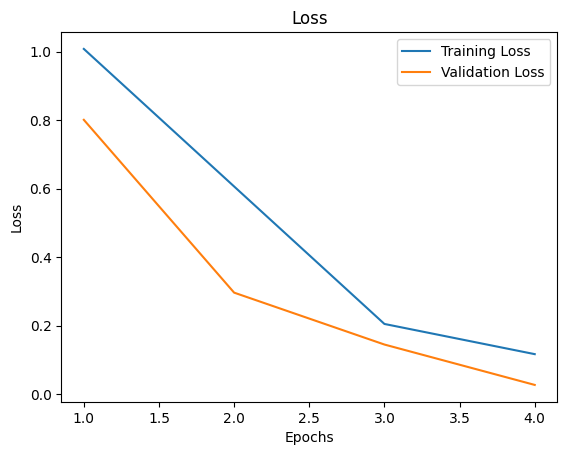

In [ ]:
# Visualisasi grafik loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

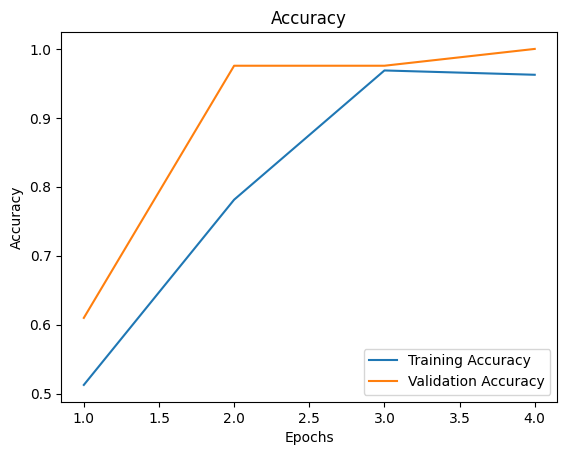

In [ ]:
# Visualisasi grafik akurasi
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluasi model pada data pengujian
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 1.0000 - loss: 0.0252
Test Loss: 0.02647755853831768
Test Accuracy: 1.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


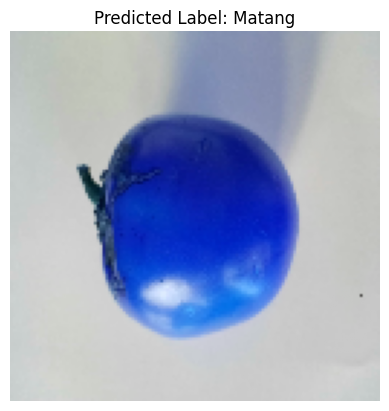

In [ ]:
# Contoh penggunaan model untuk prediksi pada data baru
new_data_path = '/content/drive/MyDrive/Colab Notebooks/buah tomat/Matang/1 (1).jpg'  # Update with the correct image path
new_data = cv2.imread(new_data_path)

# Check if the image was loaded successfully
if new_data is not None:
    new_data = cv2.resize(new_data, img_size)
    new_data = new_data.reshape(1, img_size[0], img_size[1], 3) # Reshape using img_size
    new_data = new_data / 255.0
    prediction = model.predict(new_data)
    predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])

    # Menampilkan gambar baru yang diuji
    plt.imshow(new_data[0])
    plt.title('Predicted Label: ' + predicted_label[0])
    plt.axis('off')
    plt.show()
else:
    print(f"Error: Image not found at {new_data_path}")

In [ ]:
# Simpan model ke file model.h5
model.save('model.h5')